In [1]:
import pandas as pd 
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\ANNAMREDDY  JYOTHSNA\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ANNAMREDDY  JYOTHSNA\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [3]:
df =pd.read_csv('my_movies (1).csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
df.drop(columns = ['V1', 'V2', 'V3', 'V4', 'V5'], inplace = True)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [6]:
df.tail()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [8]:
df.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [9]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))

In [10]:
uni(df)


 All Unique Value in Sixth Sense
[0 1]
Total no of unique values 2

 All Unique Value in Gladiator
[0 1]
Total no of unique values 2

 All Unique Value in LOTR1
[0 1]
Total no of unique values 2

 All Unique Value in Harry Potter1
[0 1]
Total no of unique values 2

 All Unique Value in Patriot
[0 1]
Total no of unique values 2

 All Unique Value in LOTR2
[0 1]
Total no of unique values 2

 All Unique Value in Harry Potter2
[0 1]
Total no of unique values 2

 All Unique Value in LOTR
[0 1]
Total no of unique values 2

 All Unique Value in Braveheart
[0 1]
Total no of unique values 2

 All Unique Value in Green Mile
[0 1]
Total no of unique values 2


In [11]:
count = df.sum()
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

C:\Users\ANNAMREDDY  JYOTHSNA\AppData\Local\Temp\ipykernel_28364\1255116913.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  count.sort_values(0, ascending = False, inplace=True)


,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


Text(0.5, 1.0, 'Movies Purchase Frequency')

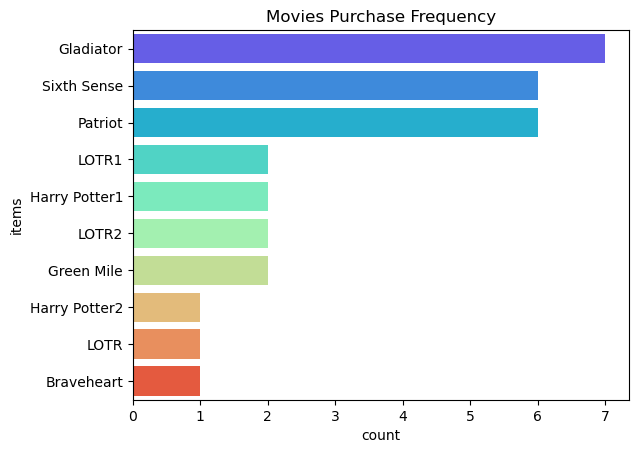

In [12]:
sns.barplot(x = 'count', y = 'items', data = count, palette = 'rainbow')
plt.title('Movies Purchase Frequency')

In [13]:
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

C:\Users\ANNAMREDDY  JYOTHSNA\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [14]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
241,(LOTR2),"(LOTR1, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
244,(Green Mile),"(LOTR2, LOTR1, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [15]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
208,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
104,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
210,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
209,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
165,"(LOTR1, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
5,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


In [16]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
241,(LOTR2),"(LOTR1, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
244,(Green Mile),"(LOTR2, LOTR1, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


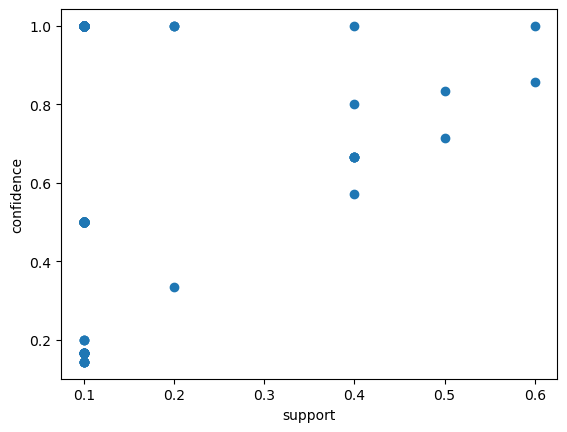

In [17]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()